In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle
import pandas as pd
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

sns.set()

Using TensorFlow backend.
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/matt/anaconda3/envs/ML/lib/p

In [2]:
def reading_in_data(filename):
    
    filename = str(filename)

    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict


In [3]:
input_data_quasar_fake = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/low_fake_star_input_data")


input_data_quasar_low = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/var_star_preprocessed_data_low")

input_data_quasar_high = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/quasar_star_preprocessed_data_high")





In [4]:
# input_data_quasar_high = reading_in_data("quasar_star_preprocessed_data_high")

# input_data_quasar_low = reading_in_data("quasar_star_preprocessed_data_low")

In [5]:
print(len(input_data_quasar_fake['LABELS']))
print(len(input_data_quasar_low['LABELS']))

4860
4910


In [6]:
input_data_quasar_fake.keys()

dict_keys(['IMAGES', 'LABELS', 'NOISE', 'FLUX', 'WAVE', 'REDSHIFT', 'FAKE_NOISE'])

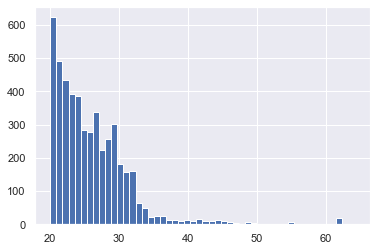

In [7]:
a,b,c = plt.hist(input_data_quasar_fake['NOISE'][:10035], bins = 50)

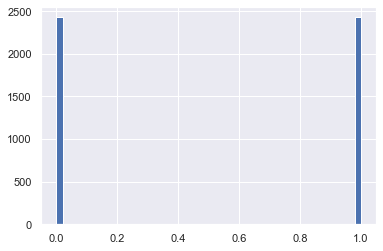

In [8]:
a,b,c = plt.hist(input_data_quasar_fake['LABELS'], bins = 50)

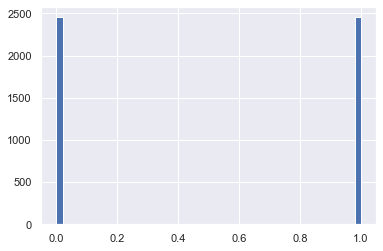

In [9]:
a,b,c = plt.hist(input_data_quasar_low['LABELS'], bins = 50)

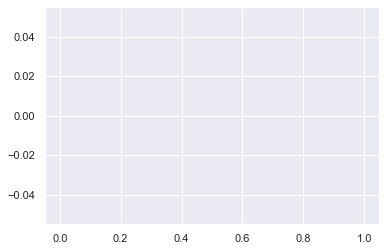

In [10]:
a,b,c = plt.hist(input_data_quasar_low['NOISE'][10035:11806], bins = 50)

In [11]:
# train_images = input_data_quasar_high['IMAGES'][:1000, :, :, :]
# print(np.shape(train_images))
# train_labels = input_data_quasar_high['LABELS'][:1000]
# print(np.shape(train_labels))

# val_images = input_data_quasar_high['IMAGES'][8265:10035, :, :, :]
# print(np.shape(val_images))
# val_labels = input_data_quasar_high['LABELS'][8265:10035]
# print(np.shape(val_labels))

# test_images = input_data_quasar_low['IMAGES'][:15806, :, :, :]
# print(np.shape(test_images))
# test_labels = input_data_quasar_low['LABELS'][:15806]
# print(np.shape(test_labels))

In [12]:
# labels = train_labels

# a,b,c = plt.hist(labels, bins =50)

In [13]:
# train_images = input_data_quasar_high['IMAGES'][:8265, :, :, :]
# print(np.shape(train_images))
# train_labels = input_data_quasar_high['LABELS'][:8265]
# print(np.shape(train_labels))

# val_images = input_data_quasar_high['IMAGES'][8265:10035, :, :, :]
# print(np.shape(val_images))
# val_labels = input_data_quasar_high['LABELS'][8265:10035]
# print(np.shape(val_labels))

# test_images = input_data_quasar_low['IMAGES'][10035:11806, :, :, :]
# print(np.shape(test_images))
# test_labels = input_data_quasar_low['LABELS'][10035:11806]
# print(np.shape(test_labels))

In [14]:
train_images = input_data_quasar_fake['IMAGES'][:4131, :, :, :]
print(np.shape(train_images))
train_labels = input_data_quasar_fake['LABELS'][:4131]
print(np.shape(train_labels))

val_images = input_data_quasar_fake['IMAGES'][4131:4860, :, :, :]
print(np.shape(val_images))
val_labels = input_data_quasar_fake['LABELS'][4131:4860]
print(np.shape(val_labels))

test_images = input_data_quasar_low['IMAGES'][4174:4910, :, :, :]
print(np.shape(test_images))
test_labels = input_data_quasar_low['LABELS'][4174:4910]
print(np.shape(test_labels))

# test_images = input_data_quasar_high['IMAGES'][4174:4910, :, :, :]
# print(np.shape(test_images))
# test_labels = input_data_quasar_high['LABELS'][4174:4910]
# print(np.shape(test_labels))

(4131, 1, 3681, 1)
(4131,)
(729, 1, 3681, 1)
(729,)
(736, 1, 3681, 1)
(736,)


0.0
1.0
3681
3681
3681


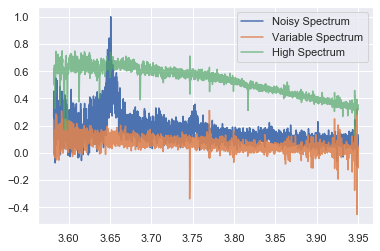

In [15]:
plt.plot(input_data_quasar_fake['WAVE'][4174], input_data_quasar_fake['FLUX'][4174], label = 'Noisy Spectrum')
plt.plot(input_data_quasar_low['WAVE'][4174], input_data_quasar_low['FLUX'][4174],alpha = 0.9, label = 'Variable Spectrum')
plt.plot(input_data_quasar_high['WAVE'][4174], input_data_quasar_high['FLUX'][4174], alpha= 0.7, label = 'High Spectrum')
plt.legend()

print(input_data_quasar_fake['LABELS'][4174])
print(input_data_quasar_low['LABELS'][4174])

print(len(input_data_quasar_fake['FLUX'][4175]))
print(len(input_data_quasar_low['FLUX'][4175]))
print(len(input_data_quasar_high['FLUX'][4175]))

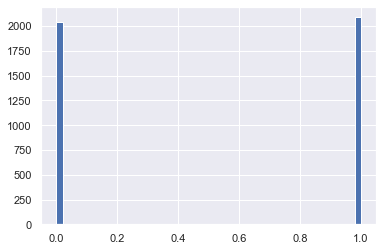

In [16]:
a,b,c = plt.hist(train_labels, bins=50 )

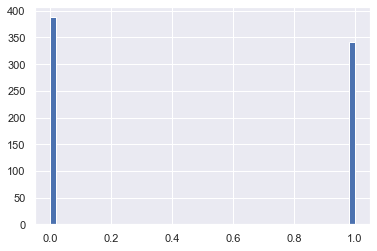

In [17]:
a,b,c = plt.hist(val_labels, bins=50 )

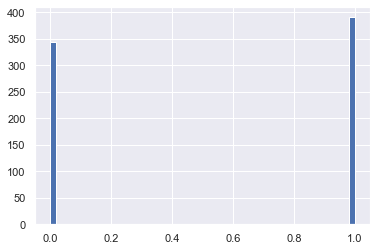

In [18]:
a,b,c = plt.hist(test_labels, bins=50 )

In [19]:
# len(train_labels)
# print(train_labels[8264])

In [20]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(12, (1, 12), activation='relu', input_shape=(1, 3681, 1), data_format='channels_last'))
model.add(keras.layers.MaxPooling2D( (1, 4)))

model.add(keras.layers.Conv2D(18, (1, 6), activation='relu', data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1, 4)))

model.add(keras.layers.Conv2D(24, (1, 6), activation='relu', data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1, 4)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))


opt = keras.optimizers.SGD(lr = 5e-3, momentum = 0.25, decay = 1e-5)
model.compile(loss='binary_crossentropy', optimizer = opt  , metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 3670, 12)       156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 917, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 912, 18)        1314      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 228, 18)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 223, 24)        2616      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 55, 24)         0         
_________________________________________________________________
flat

In [21]:
history = model.fit(train_images,
train_labels,
epochs= 80,
batch_size= 32,
validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 4131 samples, validate on 729 samples
Epoch 1/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6916 - acc: 0.5202 - val_loss: 0.6928 - val_acc: 0.4787
Epoch 2/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6892 - acc: 0.5330 - val_loss: 0.6887 - val_acc: 0.6324
Epoch 3/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6870 - acc: 0.6333 - val_loss: 0.6877 - val_acc: 0.5405
Epoch 4/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6845 - acc: 0.6132 - val_loss: 0.6833 - val_acc: 0.7599
Epoch 5/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6813 - acc: 0.7047 - val_loss: 0.6790 - val_acc: 0.7956
Epoch 6/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6764 - acc: 0.7177 - val_loss: 0.6760 - val_acc: 0.6502
Epoch 7/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.6696 - acc: 0.7323 - va

4131/4131 [==============================] - 4s 1ms/step - loss: 0.0736 - acc: 0.9777 - val_loss: 0.4104 - val_acc: 0.8957
Epoch 60/80
4131/4131 [==============================] - 4s 1ms/step - loss: 0.0811 - acc: 0.9756 - val_loss: 0.1130 - val_acc: 0.9616
Epoch 61/80
4131/4131 [==============================] - 4s 1ms/step - loss: 0.0627 - acc: 0.9821 - val_loss: 0.1049 - val_acc: 0.9739
Epoch 62/80
4131/4131 [==============================] - 4s 1ms/step - loss: 0.0571 - acc: 0.9838 - val_loss: 0.0853 - val_acc: 0.9767
Epoch 63/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.0738 - acc: 0.9792 - val_loss: 0.0749 - val_acc: 0.9822
Epoch 64/80
4131/4131 [==============================] - 4s 1ms/step - loss: 0.0743 - acc: 0.9799 - val_loss: 0.0847 - val_acc: 0.9822
Epoch 65/80
4131/4131 [==============================] - 5s 1ms/step - loss: 0.0577 - acc: 0.9828 - val_loss: 0.0835 - val_acc: 0.9739
Epoch 66/80
4131/4131 [==============================] - 5s 1ms/ste

736/736 [==============================] - 0s 421us/step
Test loss = 0.16060837552599286
Test accuracy = 0.9551630434782609


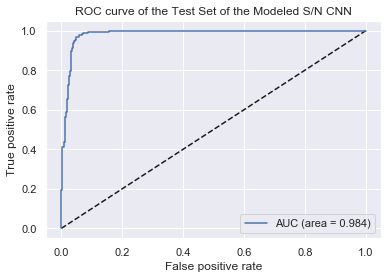

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss = ' +str(test_loss))
print('Test accuracy = ' +str(test_acc))

y_pred_keras = model.predict(test_images).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of the Test Set of the Modeled S/N CNN')
plt.legend(loc='best')
plt.show()

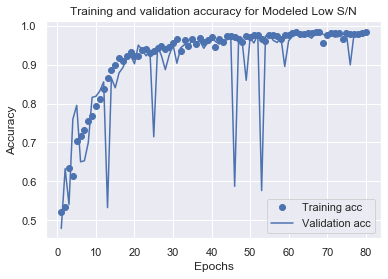

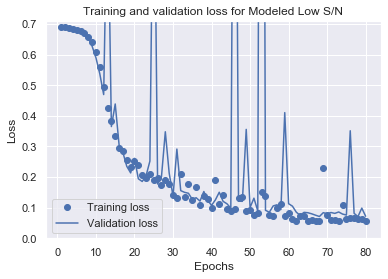

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy for Modeled Low S/N')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for Modeled Low S/N')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,.71)
plt.legend()
plt.show()




In [24]:
model.save('fake_trained_CNN.h5')
